# Basit Doğrusal Regresyon

In [2]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols= [1,2,3,4])
df= ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.isnull().values.any()

False

In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


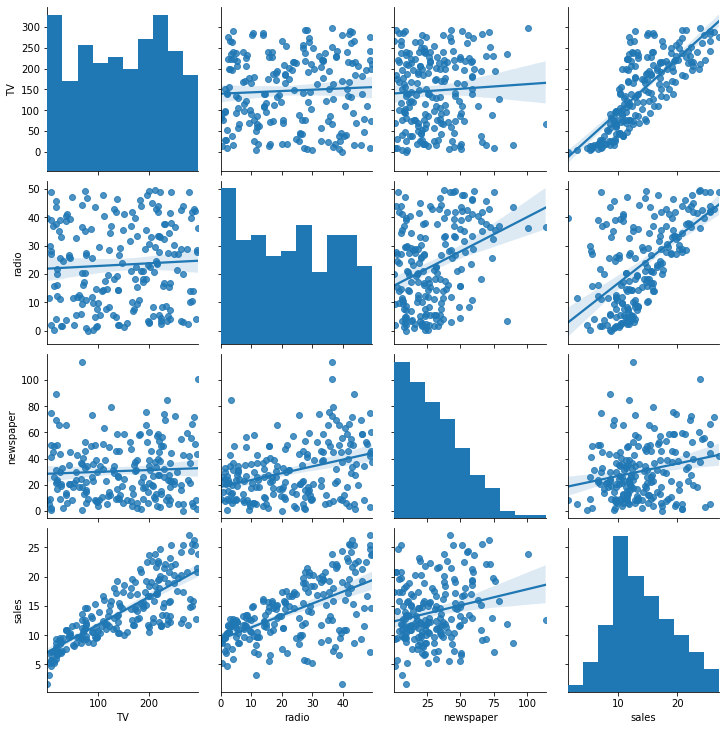

In [29]:
import seaborn as sns
sns.pairplot(df, kind= "reg");

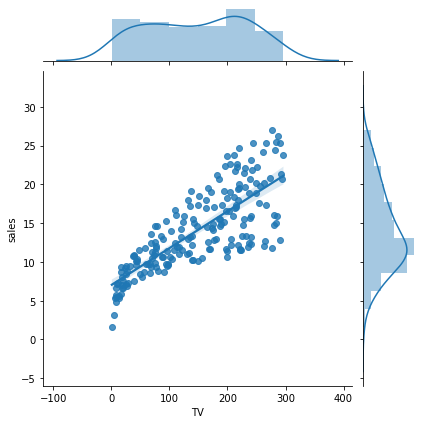

In [11]:
sns.jointplot(x = "TV", y= "sales", data=df, kind= "reg");

## Stats Model ile Modelleme

In [6]:
import statsmodels.api as sm
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [4]:
X = sm.add_constant(X)

In [5]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [6]:
y = df["sales"]

In [8]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [9]:
lm = sm.OLS(y,X) #model kurma işlemi

In [10]:
model= lm.fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):                   3.52e-100
Time:                        18:57:31   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):                   3.52e-100
Time:                        18:57:34   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.params #modelin parametrelerini direkt getirir

const    7.032594
TV       0.047537
dtype: float64

In [15]:
model.summary().tables[1] #katsayıları elde ettik

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [17]:
model.conf_int() #katsayıların güven aralığı

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [19]:
model.f_pvalue #modelin anlamlılığı

1.467389700194647e-42

In [20]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [21]:
model.mse_model

3314.618166868649

In [23]:
model.rsquared_adj

0.6099148238341623

In [24]:
model.fittedvalues[0:5] #tahmin edilen değerler

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [25]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [27]:
print("Sales =" + str("%.2f" % model.params[0]) + "+ TV" + "*" +str("%.2f" % model.params[1]))

Sales =7.03+ TV*0.05


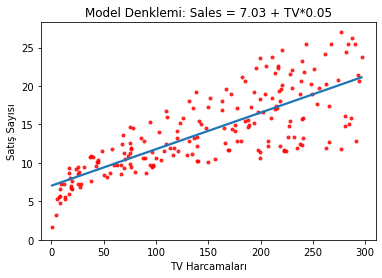

In [30]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_

array([0.04753664])

In [33]:
model.score(X,y) #score r'2 değeri

0.611875050850071

In [34]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

# Tahmin

## Model denklemi

### Sales= 7.03 + TV*0.04

## Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [36]:
sales= 7.03 + 30*0.04
sales

8.23

In [37]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [38]:
model.predict([[30]])

array([8.45869276])

In [39]:
yeni_veri = [[5],[90],[200]]

In [40]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

## Artıklar ve Makine Öğrenmesindeki Önemi

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

In [26]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()

In [27]:
mse = mean_squared_error(y, model.fittedvalues) #tahmin edilen değerler ile gerçek değerler arasındaki farkların kareleri ortalaması

In [46]:
mse

10.512652915656757

In [49]:
import numpy as np
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [50]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [51]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [53]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [56]:
k_t["hata"]= k_t["gercek_y"] - k_t["tahmin_y"]

In [58]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [60]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [61]:
np.sum(k_t["hata_kare"])

92.90350329638103

In [62]:
np.mean(k_t["hata_kare"])

9.290350329638105

In [64]:
np.sqrt(np.mean(k_t["hata_kare"])) #hata kareler ortalamasının karekökü

3.048007599996776

In [65]:
model.resid[0:10] #modelin artıkları

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

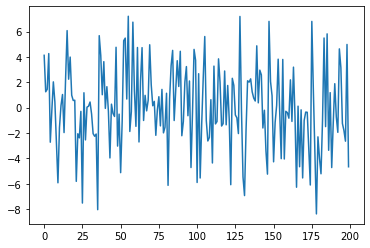

In [67]:
plt.plot(model.resid);

# Çoklu Doğrusal Regresyon

In [4]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols= [1,2,3,4])
df= ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [76]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [17]:
X = df.drop("sales" , axis=1) # sales'ı bıraktık(tüm bağımsız değişkenleri toplamış olduk)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [18]:
X_train.shape

(160, 3)

In [19]:
y_train.shape

(160,)

In [81]:
X_test.shape

(40, 3)

In [82]:
y_test.shape

(40,)

In [83]:
training = df.copy()

In [84]:
training.shape

(200, 4)

In [85]:
training

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Statsmodels

In [20]:
lm = sm.OLS(y_train, X_train)

In [21]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):                   1.28e-137
Time:                        18:58:34   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Scikit-Learn Model

In [91]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [92]:
model.intercept_

2.979067338122629

In [93]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

# Tahmin

## Model denklemi:

### Sales = 2.97 + TV0.04 + radio0.18 + newspaper*0.002

### Örneğin 30 birim TV harcaması, 10 birim radio harcamasi, 40 birimde gazete harcaması olduğunda satışların tahmini değeri ne olur?


In [94]:
yeni_veri= [[30],[10],[40]]
yeni_veri= pd.DataFrame(yeni_veri).T

In [95]:
model.predict(yeni_veri)

array([6.32334798])

In [96]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [97]:
rmse

1.644727765644337

In [98]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [99]:
rmse

1.7815996615334502

## Model Tuning / Model Doğrulama

In [100]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [30]:
X = df.drop('sales', axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)

In [31]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.6748559274650712

In [32]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.6640263686701036

In [33]:
model.score(X_train, y_train)

0.8971614078663419

In [34]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()

0.8733783298422942

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import numpy as np
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean()

1.6649345607872927

In [36]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring = "neg_mean_squared_error")).mean() #10 adet eğitim hatası oluşturuldu

1.7399924960346644

## Ridge Regresyon
#### Hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmak( ilgisiz değişkenleri çıkarmaz sadece katsayılarını sıfıra yaklaştırır. )

## Model

In [40]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [45]:
from sklearn.linear_model import Ridge

In [50]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [48]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1)
X.head()
ridge_model

Ridge(alpha=0.1)

In [51]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [52]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

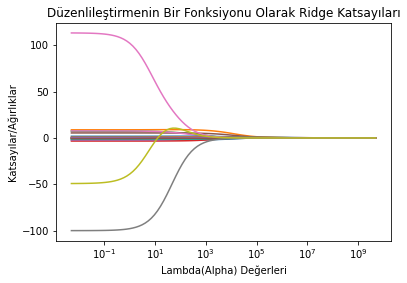

In [54]:
import matplotlib. pyplot as plt 
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

## Tahmin

In [55]:
y_pred = ridge_model.predict(X_test)

In [56]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.0517922282844

## Model Tuning

In [58]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [59]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [60]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [62]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [63]:
ridge_cv.alpha_

0.7599555414764666

In [64]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [65]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.6826429756415

## Lasso Regresyon 
### (ridge regresyondan farklı olarak ilgisiz değişkenlerin katsayılarını sıfıra eşitler.)

### Model

In [66]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [67]:
from sklearn.linear_model import Lasso

In [68]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

C:\Users\soft1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388096, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [69]:
lasso_model

Lasso(alpha=0.1)

In [70]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Users\soft1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\soft1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679608315, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\soft1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137549877, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\soft1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarnin

Text(0, 0.5, 'weights')

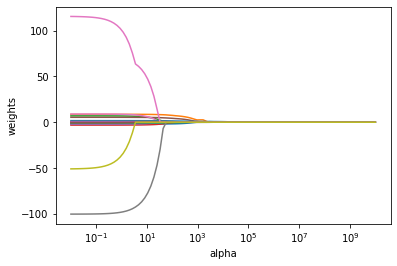

In [71]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

## Tahmin 

In [72]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [73]:
y_pred = lasso_model.predict(X_test)

In [74]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.7545270148768

## Model Tuning

In [75]:
from sklearn.linear_model import LassoCV

In [76]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [77]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [78]:
lasso_cv_model.alpha_

0.39406126432470073

In [79]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [80]:
lasso_tuned.fit(X_train, y_train)

C:\Users\soft1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523985, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.39406126432470073)

In [81]:
y_pred = lasso_tuned.predict(X_test)

In [82]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.5226376958367

# ElasticNet Regresyonu 
## (ridge ve lasso regresyonu birleştirir.)

In [83]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [84]:
from sklearn.linear_model import ElasticNet

In [85]:
enet_model = ElasticNet().fit(X_train, y_train)

C:\Users\soft1\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367279, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [86]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [87]:
enet_model.intercept_

-6.465955602113127

## Tahmin

In [89]:
enet_model

ElasticNet()

In [90]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [91]:
y_pred = enet_model.predict(X_test)

In [92]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181244

In [93]:
r2_score(y_test, y_pred)

0.41070222469326945

## Model Tuning

In [94]:
from sklearn.linear_model import ElasticNetCV

In [95]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [96]:
enet_cv_model.alpha_

5230.7647364798695

In [97]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [98]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [99]:
y_pred = enet_tuned.predict(X_test)

In [100]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795